In [1]:
%matplotlib inline

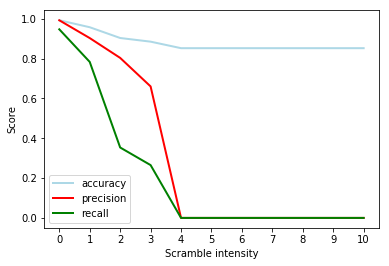

In [4]:
import matplotlib.pyplot as plt
from utils import get_saved_data, get_binetflow_files, get_feature_labels
from binet_keras import keras_train_and_test
import random
import numpy as np


binet_files = get_binetflow_files()
best = [8, 9, 12]
summaries = []
for i in best:
    summaries += get_saved_data(0.15, binet_files[i])

scores = []
prec = []
rec = []
feature, label = get_feature_labels(summaries)
# normal score
acc, p, r = keras_train_and_test(feature, label)
scores.append(acc)
prec.append(p)
rec.append(r)

mstd = list(zip(np.mean(feature, axis=0), np.std(feature, axis=0)))

# blur the data a bit, make it stronger each iteration
for i in range(1, 11):
    indices = [random.randrange(len(feature)) for _ in range(int(len(feature) * ((i*10)/100)))]
    feats = feature[:]
    for index in indices: 
        feats[index]  = [feats[index][i] + np.random.normal(mstd[i][0], mstd[i][1]) for i in range(len(feats[index]))]
    acc, p, r = keras_train_and_test(feats, label)
    scores.append(acc)
    prec.append(p)
    rec.append(r)

plt.figure()
plt.plot(scores, "lightblue", lw=2, label="accuracy")
plt.plot(prec, color="red", lw=2, label="precision")
plt.plot(rec, color="green", lw=2, label="recall")
plt.xlabel("Scramble intensity")
plt.ylabel("Score")
plt.xticks(range(0, 11))
plt.legend(loc="best")
plt.show()

In [7]:
print("Accuracy scores: ", ", ".join('{0:.2f}'.format(s) for s in scores))
print("precision scores:", ", ".join('{0:.2f}'.format(s) for s in prec))
print("recall scores:   ", ", ".join('{0:.2f}'.format(s) for s in rec))

Accuracy scores:  0.99, 0.96, 0.90, 0.89, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85
precision scores: 0.99, 0.90, 0.80, 0.66, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00
recall scores:    0.95, 0.78, 0.35, 0.27, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00
